<a href="https://colab.research.google.com/github/tringuyenCoding/MachineLearning/blob/colab/Part_2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPLEMENTING LOGISTIC REGRESSION MODEL WITH KERAS
Instructions:
- Start the kernel: In the menu bar, select Kernel -> Restart kernel.
- Complete all sections with the comment `YOUR CODE HERE`.
- Run all code blocks to check the implementation: In the menu bar, select Cell -> Run All.

A machine learning model should have at least the following 7 methods:

- `__init__`: The constructor method in object-oriented programming, used to initialize default parameters or starting parameters of a model. In the initial exercises, for simplicity, the constructor may not be used.
- `build`: Builds the architecture of the model.
- `train`: Starts the training process of the model.
- `save`: Saves the trained model.
- `load`: Loads a pretrained model from a file.
- `summary`: Prints a summary of the model's architecture.
- `predict`: Predicts the output values based on the input data.

Please note that these are general guidelines for the methods commonly used in machine learning models. The actual implementation may vary depending on the specific requirements and the framework being used.

In [1]:
# The general implementation of the model includes 7 basic methods.
# Note: This model is just a suggestion and not mandatory.
# However, in the exercise section, it is required to adhere to these method names.
class MyModel:
    # constructor
    def __init__(self):
        return None

    # Implement architecture of the model
    def build(self):
        return None

    # Train the defined model with training and validation data
    def train(self):
        return None

    # Save the trained model to file
    def save(self, model_path):
        return None

    # Load pretrained model from file
    def load(self):
        return None
    # Visualize your model
    def summary(self):
        return None

    # Apply your model with new input data
    def predict(self):
        return None

## Step 1. Importing Keras Libraries

First, we will import the necessary libraries, modules, and functions from `Keras`:
- `Input`: to receive input data for the model.
- `Dense`: also known as the Fully Connected layer, an important component of Neural Network-based models.
- `Model`: this is the model object class used to encapsulate the input and output layers, and then train the model using the `fit` method and make predictions using the `predict` method.
- `load_model`: a function used to load a model from a file.

In [2]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model

## Step 2. Implementing Logistic Regression Model

Next, we will use the object framework `MyModel` presented earlier to implement the **Logistic Regression** model. The main method to be implemented in this exercise is `def build()`. The remaining methods have already been implemented, and you should read and understand their purpose and usage for future reference.

<p align="center">
  <img src="LogisticReg.png" />
</p>

In [3]:
# Logistic Regression
class LogisticRegression:
    def __init__(self): # Self is similar to your 'this' pointer in C++
        return None

    def build(self, input_dim):

        self.model = None
        # Please implement the code to define the MODEL ARCHITECTURE and save it in the `self.model` attribute
        # with the following object variables:
        #  - Create a variable `input` with the `Input` object class from Keras,
        #    passing the input dimension `input_dim`
        #  - Create a variable `output` with the `Dense` object class from Keras,
        #    passing the following parameters: output dimension, use bias,
        #    and use the `sigmoid` activation function
        # After this step, self.model will encapsulate the `input` and `output` variables to form the model
        ### YOUR CODE HERE
        input = Input(shape = (input_dim,))
        output = Dense(1,activation='sigmoid', use_bias=True)(input)
        self.model = Model(input, output)
        return self.model

    def train(self, x_train, y_train):
        opt = tf.keras.optimizers.SGD(learning_rate=0.1) # Stochastic Gradient Descent
        self.model.compile(optimizer=opt, loss='binary_crossentropy') # BCE loss
        return self.model.fit(x_train, y_train, epochs=50)

    def save(self, model_file):
        return self.model.save(model_file)

    def load(self, model_file):
        self.model = load_model(model_file)

    def summary(self):
        self.model.summary()

    def predict(self, x_test):
        return self.model.predict(x_test)

    def get_weights(self):
        return self.model.layers[1].get_weights()

Next, we will initialize an instance of the LogisticRegression object and test whether the `build` method has been implemented correctly.

In [4]:
lr = LogisticRegression()
# In this example, we will initialize the input as a 1000-dimensional vector.
lr.build(1000)

In [5]:
# Check the architecture containing Input and Output classes.
assert len(lr.model.layers)==2
assert str(type(lr.model.layers[0]))== "<class 'keras.engine.input_layer.InputLayer'>"
assert str(type(lr.model.layers[1]))== "<class 'keras.layers.core.dense.Dense'>"
assert lr.model.layers[0].input_shape[0][1] == 1000
assert lr.model.layers[1].activation(0.0).numpy() == 0.5


AssertionError: 

In [ ]:
# Test with hidden tests.

## Step 3.  Step 3. Generate Sample Data (Toy Example).
Next, we will proceed to generate sample data for training and testing.

The data is generated as 2 clusters of points randomly distributed around two cluster centers:
- [1, 5]
- [5, 1]

Note that these two points are sufficiently far apart so that the randomly generated points do not overlap with each other.

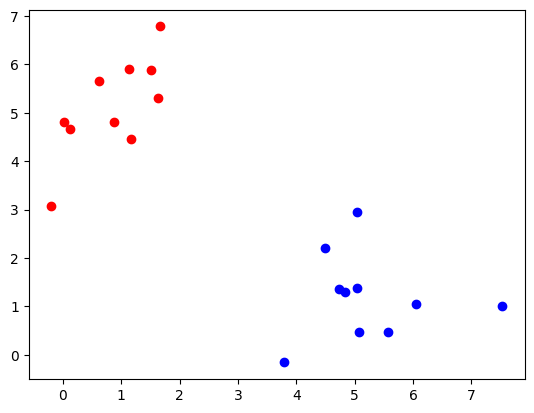

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n_sample = 10

# Generate sample data (toy example).
red_points = np.random.randn(n_sample, 2) + np.array([[1,5]])
blue_points = np.random.randn(n_sample, 2) + np.array([[5,1]])
x_train = np.concatenate((red_points, blue_points))
y_train = np.concatenate((np.ones(n_sample), np.zeros(n_sample)))

# Create a validation dataset.
red_points_test = np.random.randn(n_sample, 2) + np.array([[1,5]])
blue_points_test = np.random.randn(n_sample, 2) + np.array([[5,1]])
x_test = np.concatenate((red_points_test, blue_points_test))
y_test = np.concatenate((np.ones(n_sample), np.zeros(n_sample)))

# Visualize the data using red and blue circles.
plt.plot(red_points[:,0], red_points[:,1], 'ro')
plt.plot(blue_points[:,0], blue_points[:,1], 'bo')


## Step 4. Train the model with the sample data

Next, we will reinitialize the model to fit the generated sample data from the previous step. The architecture of the model must be compatible with the dimensions of the sample data.

In [8]:
lr = LogisticRegression()

# Call the `build` method for the `lr` object and pass the corresponding input parameters
# for the training data generated in the above code block.
# According to you, what is the value of `input_dim`?

### YOUR CODE HERE
lr.build(2)
# To display the architecture of the model, you can call the `summary` method.
print("The architecture of the Logistic Regression: ")
lr.summary()

The architecture of the Logistic Regression: 
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the invocation of the `build` method.

In [9]:
# To train the model, we call the `train` method with the generated sample data.
# If the `build` step of the model is called correctly, the subsequent `train` step will be executed successfully.
hist = lr.train(x_train, y_train)

Epoch 1/50
1/1 [==============================] - 0s 465ms/step - loss: 2.7246
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 2.0027
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 1.3243
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 0.7673
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 0.4259
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2641
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1843
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1397
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1122
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0939
Epoch 11/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0812
Epoch 12/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0719
Epoch 13/50
1/1 [==============================] - 0s 8ms/step - los

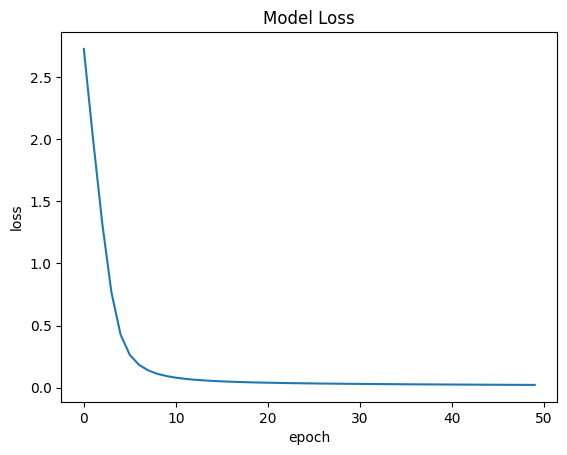

In [10]:
# Display the loss per epoch.
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [11]:
# After training, we save the model for future reuse.
# Note: The two methods `save`
# and `load` are used when you want to reuse the model multiple times WITHOUT THE NEED TO RETRAIN it.
lr.save('logistic_regression_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Step 5. Visualizing the Model and Making Predictions with Test Data.

In [12]:
# Create a new object and call the method to load the model from a file.
pretrain_lr = LogisticRegression()
pretrain_lr.load('logistic_regression_model.h5')

In [13]:
theta = pretrain_lr.get_weights()
print('The optimal parameters: ')
print(theta)
bias = theta[1][0] # Bias is indeed represented as θ₀ in the original model.
theta1 = theta[0][0][0]
theta2 = theta[0][1][0]
print('Where:')
print('   - bias (intercept): ', bias)
print('   - theta1 (coefficient for x1): ', theta1)
print('   - theta2 (coefficient for x2): ', theta2)

The optimal parameters: 
[array([[-1.0262665],
       [ 1.0148809]], dtype=float32), array([-0.30205214], dtype=float32)]
Where:
   - bias (intercept):  -0.30205214
   - theta1 (coefficient for x1):  -1.0262665
   - theta2 (coefficient for x2):  1.0148809


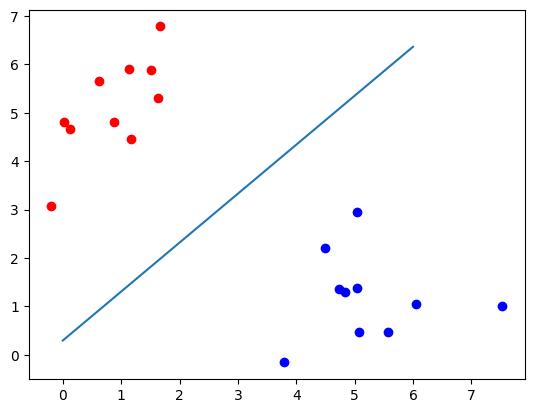

In [14]:
# Visualize the data and the trained model.
plt.plot(red_points[:,0], red_points[:,1], 'ro')
plt.plot(blue_points[:,0], blue_points[:,1], 'bo')

# Visualize the line that separates the two classes, red and blue.
# The smallest and largest values that x1 can take from 0 to 6.
x1=[0, 6]
# To calculate the value of x2 based on the equation of a line:
# theta1*x1 + theta2*x2 + bias = 0
# => x2 = -(theta1*x1 + bias)/theta2
x2=[-(theta1*x1[0]+bias)/theta2, -(theta1*x1[-1]+bias)/theta2]
plt.plot(x1, x2)
plt.show()

Therefore, we can see that the trained coefficients correspond to the equation of a line that separates the red and blue training points.

In [15]:
# Mean squared error (MSE) when testing on the test set.
y_pred = lr.predict(x_test)[:,0]
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print('Predicted labels on the test set: ')
print(y_pred)
print('Generated labels (test set): ')
print(y_test)

1/1 [==============================] - 0s 76ms/step
Predicted labels on the test set: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Generated labels (test set): 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


As we can see, the predicted values `y_pred` are **almost accurate** compared to the generated data `y_test`. There may be cases where `y_pred` does not match `y_test`, depending on the noise factor when generating the data.

To calculate the overall accuracy, we count the total number of samples where the predicted value matches the generated value, and then divide it by the total number of samples.

In [16]:
def accuracy(y_pred, y_test):
    acc = None
    # Calculate the variable `acc` to store the accuracy percentage
    # using the formula: the total number of correctly predicted samples
    # (where `y_pred` matches `y_test`) divided by the total number of samples
    # in the test set.
    # Note: The minimum value is 0%, and the maximum value is 100%.
    ### YOUR CODE HERE
    total_correct_predict = sum(y_pred == y_test)
    total_sample = len(y_test)
    acc = (total_correct_predict/total_sample) * 100
    return acc

In [17]:
print("Accuracy on the test set: ", accuracy(y_pred, y_test), "(%)")

Accuracy on the test set:  100.0 (%)


In [18]:
# Test with some open test cases.
assert accuracy(np.array([1, 1]), np.array([0, 1])) == 50.0
assert accuracy(np.array([1, 0, 1]), np.array([0, 1, 0])) == 0.0

In [ ]:
# Test with hidden test cases.